In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def square(amp,offset,period,density,start,end):
    length = (end-start)*density
    y = np.zeros(length,float)
    y.fill(offset)
    for x in range(length):
        x -= start
        if (x/density)%period < period/2:
            y[x] += amp
        else:
            y[x] -= amp
    x = np.linspace(start,end,(end-start)*density)
    return x,y


def integrate(x,y):
    length = len(x)-1
    total = 0
    for i in range(length):
        total += (x[i+1]-x[i]) * (y[i]+y[i+1])
    return total/2

def fourier(y):
    length = len(y)
    x = np.arange(0,len(y))
    an, bn = np.zeros(int(length/2), np.float64), np.zeros(int(length/2), np.float64)
    an[0] = sum(y)
    for i in range(1,int(length/2)):
        an[i] = (np.dot(y,np.cos(2*np.pi/len(y)*i*x)))
        bn[i] = (np.dot(y,np.sin(2*np.pi/len(y)*i*x)))
    return an/length*2,bn/length*2

Text(0, 0.5, 'temperature(°C)')

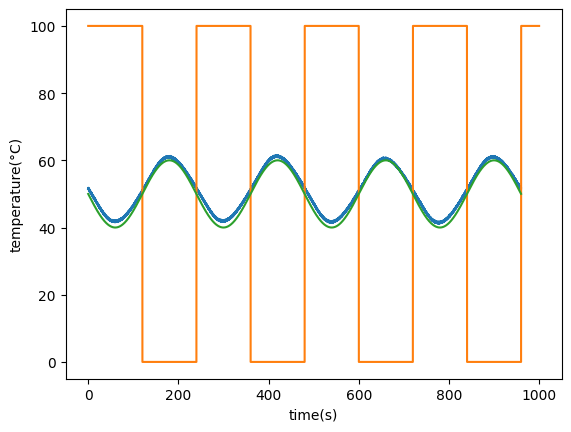

In [32]:
x1, y1 = np.loadtxt("thermal_4min_a.txt", unpack=True, skiprows=3)
plt.plot(x1/10,y1)

x2, y2 = square(50,50,240,100,0,1000)
plt.plot(x2,y2)



def sin(x,amp,phase,offset):
    return amp*np.sin(2*np.pi/2400*x+phase)+offset

plt.plot(x1/10,sin(x1,10,np.pi,50))
plt.xlabel("time(s)")
plt.ylabel("temperature(°C)")


In [3]:
x1, y1 = np.loadtxt("thermal_4min_a.txt", unpack=True, skiprows=3)
an,bn = fourier(y1)

an = np.array(an)
bn = np.array(bn)

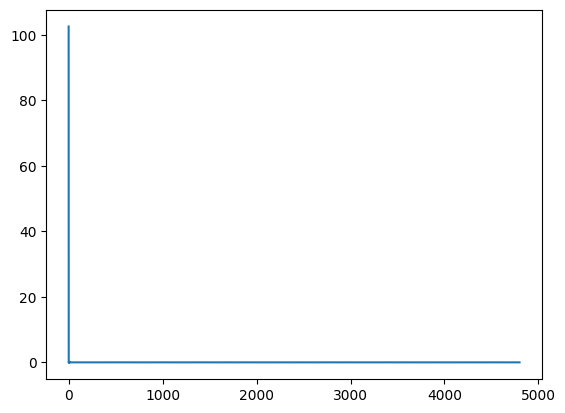

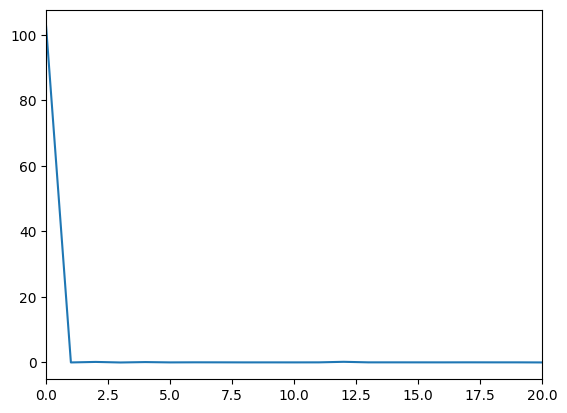

In [4]:
plt.plot(an)
plt.show()

plt.xlim(0,20)
plt.plot(an)

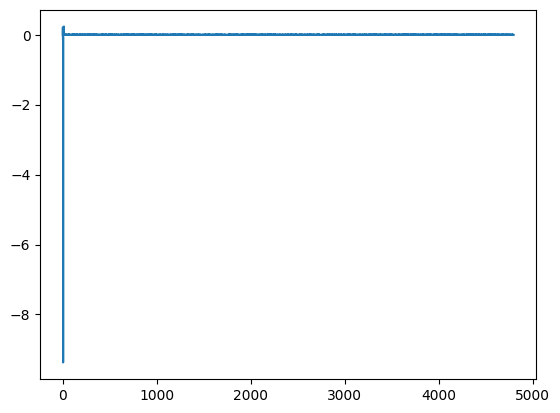

(0.0, 20.0)

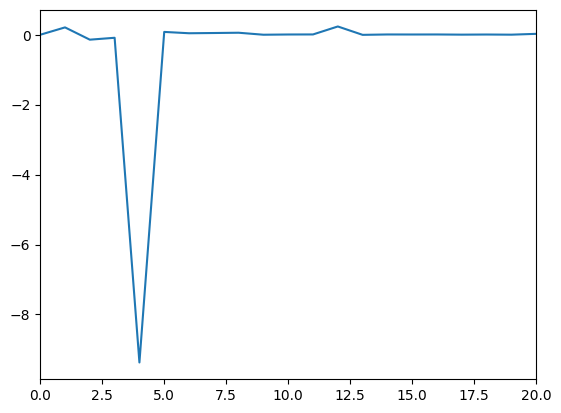

In [5]:
plt.plot(bn)
plt.show()

plt.plot(bn)
plt.xlim(0,20)



amplitude: 9.373875989233472
phase: 3.1327479201633444


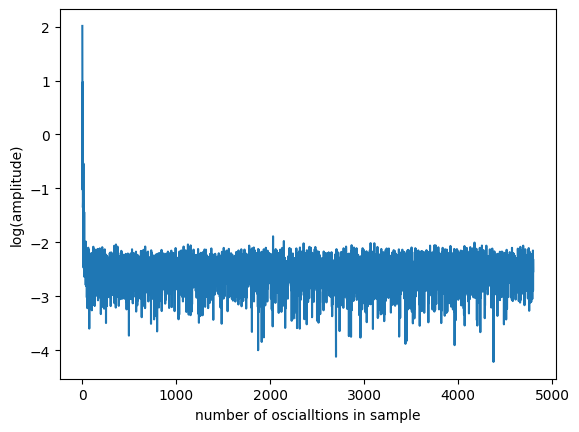

In [6]:
num = 9600

magnitude = np.sqrt(an[:num]**2+bn[:num]**2)
plt.plot(np.log10(magnitude))
plt.ylabel("log(amplitude)")
plt.xlabel("number of oscialltions in sample")

phase = np.arctan2(an[:num],bn[:num])
print(f"amplitude: {(an[4]**2+bn[4]**2)**0.5}")
print(f"phase: {phase[4]}")



Text(0.5, 1.0, 'log($\\sqrt{a_n^2+b_n^2}$)')

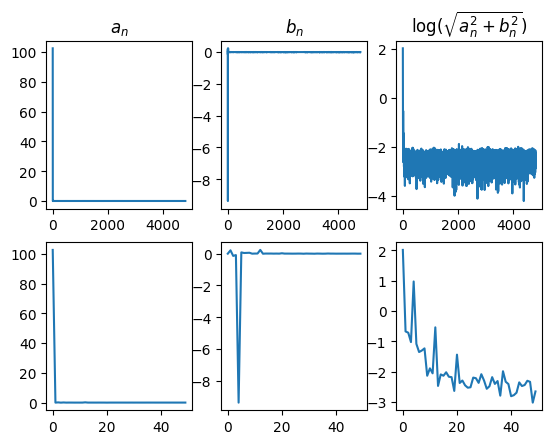

In [7]:
fig, ax = plt.subplots(2,3)
ax[0,0].plot(an)
ax[0,1].plot(bn)
ax[0,2].plot(np.log10(np.sqrt(an**2+bn**2)))
ax[1,0].plot(an[:50])
ax[1,1].plot(bn[:50])
ax[1,2].plot(np.log10(np.sqrt(an[:50]**2+bn[:50]**2)))

ax[0,0].set_title("$a_n$")
ax[0,1].set_title("$b_n$")
ax[0,2].set_title(r"log($\sqrt{a_n^2+b_n^2}$)")

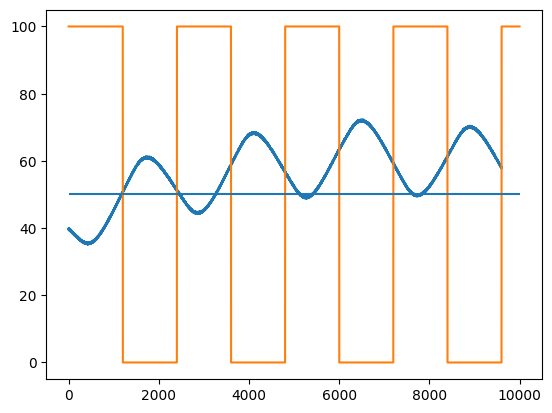

In [8]:
x3, y3 = np.loadtxt("thermal_4min_b.txt", unpack=True, skiprows=3)
plt.plot(x3,y3)

x2, y2 = square(50,50,2400,100,0,10000)
plt.plot(x2,y2)

plt.hlines(50,0,10000)